In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

Linear regression is a supervised learning (has labeled data as input) algorithm for predicting values. The algorithm is fed with samples - with multiple features and it's corresponding labels ("correct values") for what you are trying to predict.

# Variables and Constants

- $M$ - Number of samples
- $N$ - Number of features
- $\boldsymbol{\theta}$ - Vector of minimizing parameters
- $\mathbf{X}$ - Matrix of features (columns) per samples (rows)
- $\mathbf{y}$ - Vector of corresponding labels

In [2]:
M = 50
N = 1

# Random X and Y (y = ax + b w/ a~10, b~4)
x = np.array([[max(i,1)*random.gauss(1,0.10)] for i in range(M)]);
y = np.array([[(max(i,1)*random.gauss(4,1)+(10))] for i in range(M)]);

print("    x     |     y    ")
for i in range(M):
    print("%9.4f | %9.4f" % (x[i], y[i]))

    x     |     y    
   1.0494 |   14.6690
   1.0476 |   15.4008
   1.9251 |   18.6839
   2.8360 |   21.6210
   3.7500 |   23.8732
   4.6998 |   22.3670
   6.4171 |   38.7749
   6.8302 |   24.7118
   7.6137 |   48.0744
   9.9340 |   49.3834
  11.5247 |   51.3632
  12.2368 |   47.9451
  12.0552 |   57.6799
  12.6854 |   54.1181
  15.3542 |   78.1910
  14.9765 |   77.3857
  16.9608 |   83.8796
  19.5983 |   91.1511
  20.1708 |   75.7328
  21.7048 |   97.7271
  21.9864 |   99.8441
  19.1896 |  105.1784
  19.2178 |  110.5314
  21.8168 |   95.7687
  23.4695 |  134.7142
  23.1456 |  142.9129
  23.9717 |  132.1092
  23.3590 |   86.5693
  27.1858 |  130.4568
  27.8318 |  103.0959
  30.9425 |  130.0827
  30.1782 |  173.2068
  36.9151 |  125.0579
  39.0458 |  129.1889
  35.2896 |  103.0324
  28.8754 |  119.4723
  39.1542 |  162.3491
  41.7493 |  133.0983
  44.3753 |   98.7740
  33.9006 |  215.9322
  34.7599 |  140.8218
  39.2033 |  224.7434
  44.2432 |  220.1284
  36.9726 |  316.0916
  37.9927 

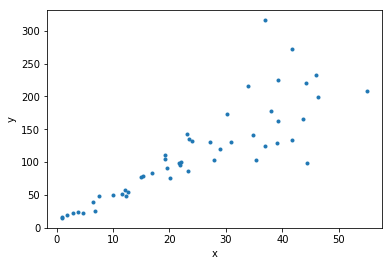

In [3]:
plt.plot(x, y, '.'), plt.xlabel('x'), plt.ylabel('y')
plt.show()

# Feature scaling (simple rescale)

For making every example in between 0 and 1 subtract the minimum value of each feature and divide by its range:

$$\delta = max(\mathbf{x_n}) - min(\mathbf{x_n})$$  
$$min = min(\mathbf{x_n})$$  
$$x_{mn} \leftarrow \frac{x_{mn} - min}{\delta}$$  

In [4]:
min = [[np.min(x)], [np.min(y)]]
delta = [[(np.max(x) - np.min(x))], [(np.max(y) - np.min(y))]]

x_old = x[:]

x = (x - min[0]*np.ones(x.shape))/delta[0]

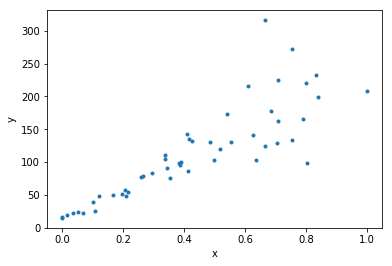

In [5]:
plt.plot(x, y, '.'), plt.xlabel('x'), plt.ylabel('y')
plt.show()

# Hyphotesis and Cost function

The objective of the linear regression is to find a *hyphotesis function*  $\mathbf{h_\theta} = \mathbf{h_\theta (X)}$ - or the parameters of this function $\boldsymbol{\theta}$ - such as the *cost function* $v = v(\boldsymbol{\theta})$ - diference between predictions and labels - is minimized. 

The most common cost function used in the linear regression is the *Mean Squared Error* (MSE) formula:  

$$v = \frac{1}{2M}\sum \limits_{m = 1}^{M}(h_m - y_m)^2$$  

Or in the vectorized notation (thus less computacionaly demanding):  

$$v = \frac{1}{2M}(\mathbf{h_\theta} - \mathbf{y})^T(\mathbf{h_\theta} - \mathbf{y})$$

For the hyphotesis, in the case of linear regression, the most general formula is:

$$\mathbf{h_\theta} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Nx_N$$

If we define an matrix $\mathbf{X'}$ such as the first column (first feature) is always 1, then we can write:

$$\mathbf{h_\theta} = \sum \limits_{n = 0}^N \theta_nx'_n$$  

or in vectorized notation:

$$\mathbf{h_\theta} = \mathbf{X'\theta}$$

In [6]:
x_prime = np.hstack((np.ones((M,1)), x)); x_prime

array([[  1.00000000e+00,   3.34946519e-05],
       [  1.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.62813008e-02],
       [  1.00000000e+00,   3.31829128e-02],
       [  1.00000000e+00,   5.01407849e-02],
       [  1.00000000e+00,   6.77643500e-02],
       [  1.00000000e+00,   9.96276448e-02],
       [  1.00000000e+00,   1.07291849e-01],
       [  1.00000000e+00,   1.21830491e-01],
       [  1.00000000e+00,   1.64880828e-01],
       [  1.00000000e+00,   1.94396420e-01],
       [  1.00000000e+00,   2.07608057e-01],
       [  1.00000000e+00,   2.04239347e-01],
       [  1.00000000e+00,   2.15931944e-01],
       [  1.00000000e+00,   2.65449440e-01],
       [  1.00000000e+00,   2.58441496e-01],
       [  1.00000000e+00,   2.95258395e-01],
       [  1.00000000e+00,   3.44196588e-01],
       [  1.00000000e+00,   3.54818910e-01],
       [  1.00000000e+00,   3.83280189e-01],
       [  1.00000000e+00,   3.88505996e-01],
       [  1.00000000e+00,   3.36613151e-01],
       [  

In [7]:
theta = np.zeros([N+1,1])

In [8]:
h = lambda X, theta: np.dot(X, theta)

In [9]:
def v (X, y, theta):
    return np.sum((h(X,theta)-y)**2)/(2*M)

# Gradient descent

Gradient descent is a simple method for finding minima (or maxima) of a function. It function by taking steps in the variables based on the gradient of the function. In the case of the linear regression the cost function J is convex (i.e. the only minimum of the function is the local minimum) so the Gradient Descent is a good method for finding minimum.  

The step of gradient descent is defined as:

$$\boldsymbol{\theta} \rightarrow \boldsymbol{\theta} - \alpha\frac{\partial{v}}{\partial \boldsymbol{\theta}}$$

Where alpha is a step magnitude constant.  
Given the derivate of the hypotesis function:

$$\frac{\partial v}{\partial \theta_n} = \frac{(h_\theta - y_m)x_{mn}}{M}$$

The particular step for the linear regression is defined as:

$$\theta_n \leftarrow \theta_n - \frac{\alpha}{M} \sum \limits _{m=1}^M (h_\theta - y_m)x_{mn}$$

$$\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \frac{\alpha}{M} \sum \limits _{m=1}^M(h_\theta - y_m)\mathbf{x_{m}^T}$$

Or in vectorized notation:

$$\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \frac{\alpha}{M}\mathbf{X' ^T(h_\theta - y)}$$

In [10]:
def gradient_step(X, y, theta, alpha=1):
    return theta - alpha*(np.dot(X.T, (h(X,theta)-y)))/M

In [12]:
axis_x = np.linspace(-50, 150, 100)/100
axis_theta_0 = np.linspace(-200, 25000, 100)/100
axis_theta_1 = np.linspace(-200, 25000, 100)/100

X, Y = np.meshgrid(axis_theta_0, axis_theta_1, sparse=False)
Z = np.zeros((100,100))

for i, e in enumerate(X[0]):
    for j, f in enumerate(Y[:,0]):
        Z[i,j] = v(x_prime, y, np.array([[e],[f]]))
        #print(e,f,Z[i,j])

In [13]:
for i in range(50):
    print("iter = ", i)
    print("theta = %.4f, %.4f" % (theta[0,0], theta[1,0]))
    print("cost function = %.4f\n" % v(x_prime,y,theta))
    
    #fig, axis = plt.subplots(nrows=1, ncols=2)
    #fig.set_size_inches(15,5)
    #axis[0].plot(x, y, '.'), axis[0].set_xlabel('x'), axis[0].set_ylabel('y'), axis[0].set_xlim([-0.1,1]),axis[0].set_ylim([-0.1,1])
    #axis[0].plot(axis_x, theta[0] +axis_x*theta[1] )                      # regression
    
    #axis[1].contour(X, Y, Z, 250), axis[1].set_xlabel('theta 1'), axis[1].set_ylabel('theta 0')
    ##axis[1].set_xlim([-1,1]),axis[1].set_ylim([-1,1])
    #axis[1].plot(theta[1,0], theta[0,0], 'ro')
    
    #plt.show()
    
    theta = gradient_step(x_prime, y, theta, 1)


iter =  0
theta = 0.0000, 0.0000
cost function = 8896.9123

iter =  1
theta = 113.5938, 65.0548
cost function = 1963.2636

iter =  2
theta = 85.3864, 64.0681
cost function = 1576.6549

iter =  3
theta = 85.8142, 75.5666
cost function = 1463.5409

iter =  4
theta = 80.8285, 83.9123
cost function = 1372.4074

iter =  5
theta = 77.2099, 92.2661
cost function = 1291.9716

iter =  6
theta = 73.5877, 100.0331
cost function = 1220.6701

iter =  7
theta = 70.2200, 107.3664
cost function = 1157.4534

iter =  8
theta = 67.0403, 114.2674
cost function = 1101.4043

iter =  9
theta = 64.0481, 120.7663
cost function = 1051.7100

iter =  10
theta = 61.2302, 126.8855
cost function = 1007.6500

iter =  11
theta = 58.5769, 132.6474
cost function = 968.5856

iter =  12
theta = 56.0786, 138.0728
cost function = 933.9503

iter =  13
theta = 53.7262, 143.1814
cost function = 903.2420

iter =  14
theta = 51.5111, 147.9917
cost function = 876.0154

iter =  15
theta = 49.4254, 152.5211
cost function = 851.8757

iter =  51
theta = 19.8878, 216.6657
cost function = 665.9037



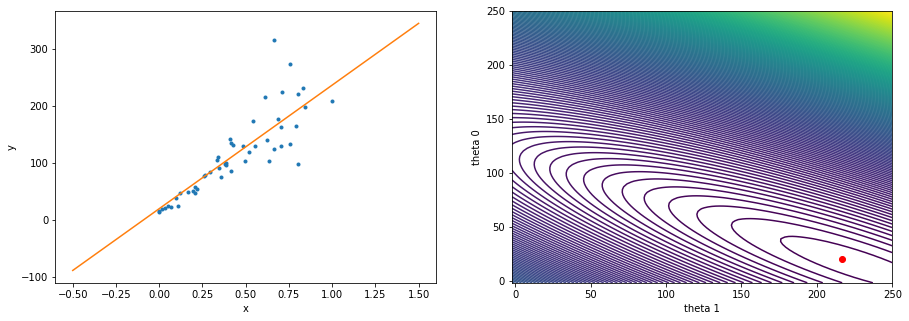

In [15]:
i += 1

print("iter = ", i)
print("theta = %.4f, %.4f" % (theta[0,0], theta[1,0]))
print("cost function = %.4f\n" % v(x_prime,y,theta))

fig, axis = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,5)
axis[0].plot(x, y, '.'), axis[0].set_xlabel('x'), axis[0].set_ylabel('y'), #axis[0].set_xlim([-0.1,1]),axis[0].set_ylim([-0.1,1])
axis[0].plot(axis_x, theta[0] +axis_x*theta[1] )                      # regression

axis[1].contour(X, Y, Z, 250), axis[1].set_xlabel('theta 1'), axis[1].set_ylabel('theta 0')
#axis[1].set_xlim([-1,1]),axis[1].set_ylim([-1,1])
axis[1].plot(theta[1,0], theta[0,0], 'ro')

plt.show()

# Rescale

Once you have your hypothesis function computated, one can easily retrieve its corresponding form in the non-normalized dataset

$$\theta_0 \leftarrow \theta_0 - min$$  
$$\theta_1 \leftarrow \frac{\theta_1}{\delta}$$ 

In [16]:
theta[1] /= delta[0][0] #*delta[1] #+ min[0]+min[1]
theta[0] -= min[0][0]

In [17]:
axis_x = np.linspace(-50, 5500, 100)/100

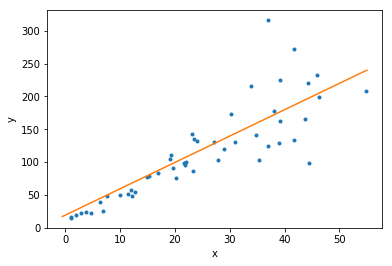

In [18]:
plt.plot(x_old, y, '.'), plt.xlabel('x'), plt.ylabel('y')
plt.plot(axis_x, theta[0] + axis_x*theta[1])
plt.show()

In [19]:
theta

array([[ 18.84022168],
       [  4.02009022]])